In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
dataset = randn(25)

(0.0, 1.0)

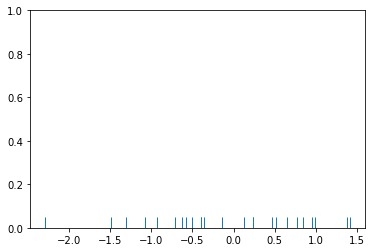

In [6]:
sns.rugplot(dataset)

plt.ylim(0,1)

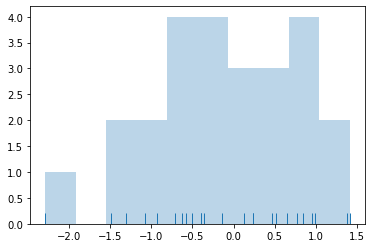

In [7]:
#histogram counts how many ticks are in each bin
#i.e. first bar has 1 tick in it so it's 1 high, etc

plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

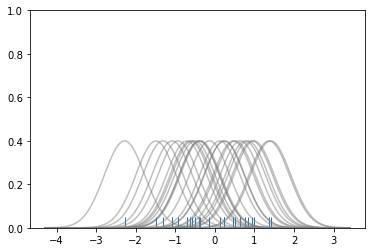

In [9]:
sns.rugplot(dataset)

# adding and subtracting 2 to add range
x_min = dataset.min() - 2 
x_max = dataset.max() + 2

#Using linspace create x-axis 100 linearally spaced
x_axis = np.linspace(x_min, x_max, 100)

#to set bandwidth will use estimation equation (equation that's already given)
bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2
             
kernel_list = []
             
for data_point in dataset:
             
    #Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
             
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
             
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

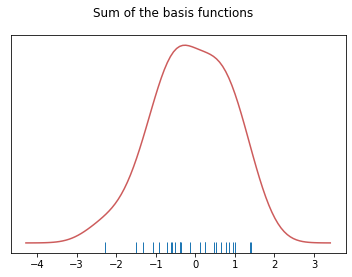

In [10]:
#KDE plot by adding up all the gaustian functions for each of the tick marks

sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

#get rid of yticks, empty list will remove
plt.yticks([])

plt.suptitle("Sum of the basis functions")

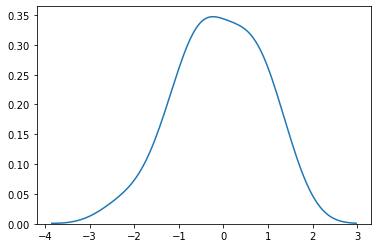

In [11]:
# short way using seaborn

sns.kdeplot(dataset)

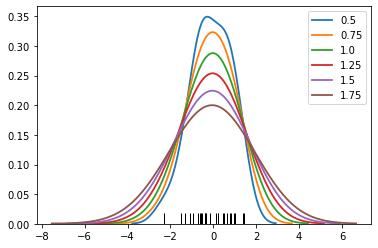

In [15]:
#Can adjust the bandwidth of the seaborn kde plot to make it more or less sensitive to high frequency datapoints

sns.rugplot(dataset, color='black')

for bandwidth in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bandwidth, lw=1.8, label=bandwidth)

In [16]:
#can choose different types of kernels
import webbrowser
url = 'http:en.wikipedia.org/wiki/Kernel_(statistics)'

webbrowser.open(url)

True

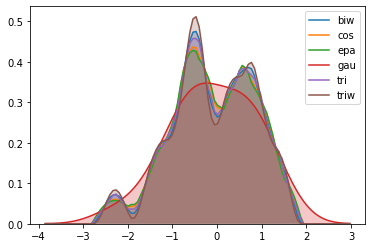

In [18]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

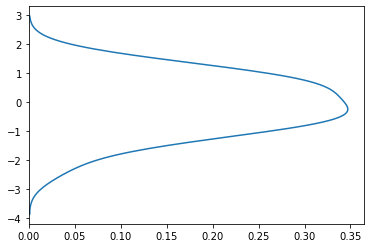

In [19]:
#can plot on the vertical axis

sns.kdeplot(dataset,vertical=True)

In [20]:
# can use kde plots to make cumulative distribution function (CDF) 
url1 = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

webbrowser.open(url1)

True

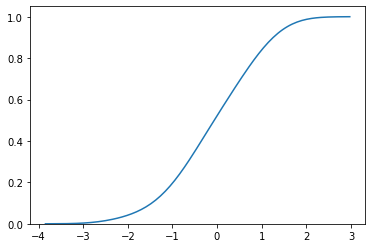

In [21]:
sns.kdeplot(dataset, cumulative = True)

C:\Users\mokae\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


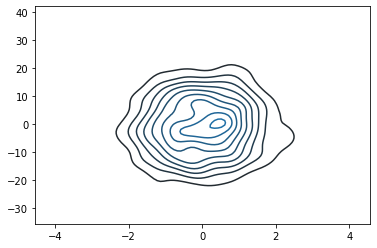

In [23]:
# can do kde plots for multi dimentional data, multi-variate

mean = [0,0]

covariance = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, covariance, 1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

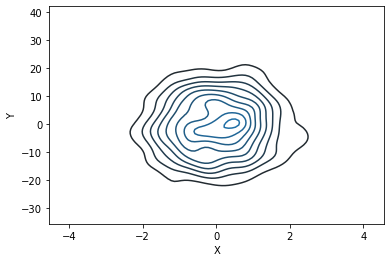

In [24]:
sns.kdeplot(dframe.X,dframe.Y)

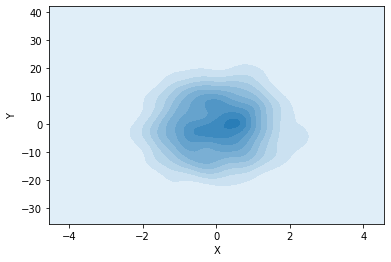

In [25]:
sns.kdeplot(dframe.X,dframe.Y, shade=True)

C:\Users\mokae\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


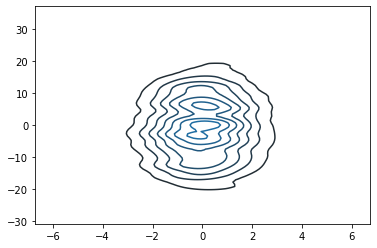

In [30]:
sns.kdeplot(dframe,bw=1)

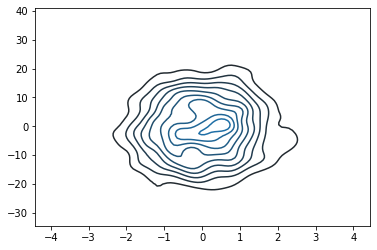

In [28]:
sns.kdeplot(dframe,bw='silverman')

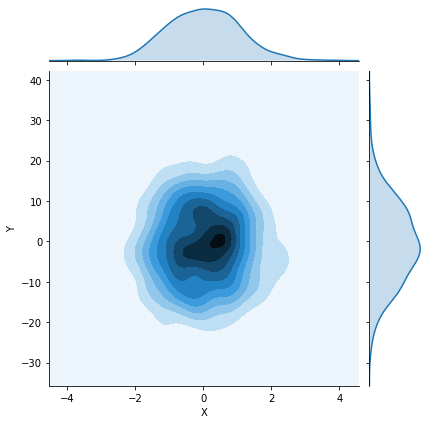

In [29]:
# creating a kde joint plot

sns.jointplot('X','Y', dframe, kind='kde')